<a href="https://colab.research.google.com/github/AVData/DS-Unit-1-Build/blob/master/DS-Unit-1-Build/Sleep_Data_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [306]:
sc_sleep_data = pd.read_csv('/content/sleepdata.csv', delimiter=';')
sc_sleep_data.head(419)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,55%,6:14,NaN,NaN,0,0
1,2018-08-22 00:08:58,2018-08-22 06:48:15,77%,6:39,NaN,NaN,0,0
2,2018-08-23 00:26:59,2018-08-23 05:14:15,57%,4:47,NaN,NaN,0,0
3,2018-08-26 02:22:35,2018-08-26 06:25:43,35%,4:03,NaN,NaN,0,0
4,2018-08-27 00:54:25,2018-08-27 08:24:27,62%,7:30,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...
414,2019-11-11 01:43:08,2019-11-11 07:18:20,61%,5:35,NaN,NaN,0,0
415,2019-11-12 00:35:05,2019-11-12 07:32:30,75%,6:57,NaN,NaN,0,3687
416,2019-11-13 01:52:17,2019-11-13 07:15:48,59%,5:23,NaN,NaN,0,2323
417,2019-11-14 00:56:41,2019-11-14 06:45:00,61%,5:48,NaN,NaN,0,2415


In [307]:
sc_sleep_data.isnull().any()

Start               False
End                 False
Sleep quality       False
Time in bed         False
Wake up              True
Sleep Notes          True
Heart rate          False
Activity (steps)    False
dtype: bool

In [308]:
sc_sleep_data.isnull().sum()

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             227
Sleep Notes         242
Heart rate            0
Activity (steps)      0
dtype: int64

In [309]:
# Dropping the 'Heart rate' column

sc_sleep_data = sc_sleep_data.drop(columns=['Heart rate', 
                                            'Wake up', 
                                            'Sleep Notes'])
sc_sleep_data.head()

,Start,End,Sleep quality,Time in bed,Activity (steps)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,55%,6:14,0
1,2018-08-22 00:08:58,2018-08-22 06:48:15,77%,6:39,0
2,2018-08-23 00:26:59,2018-08-23 05:14:15,57%,4:47,0
3,2018-08-26 02:22:35,2018-08-26 06:25:43,35%,4:03,0
4,2018-08-27 00:54:25,2018-08-27 08:24:27,62%,7:30,0


In [310]:
# converting percentages to floats

sc_sleep_data['Sleep quality'] = sc_sleep_data['Sleep quality'].str.rstrip('%').astype('float') / 100
sc_sleep_data['Sleep quality'].head()

0    0.55
1    0.77
2    0.57
3    0.35
4    0.62
Name: Sleep quality, dtype: float64

In [311]:
sc_sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 5 columns):
Start               419 non-null object
End                 419 non-null object
Sleep quality       419 non-null float64
Time in bed         419 non-null object
Activity (steps)    419 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.5+ KB


In [312]:
# Looking to create a column of days

sc_sleep_data['Start'].describe()

count                     419
unique                    419
top       2018-08-22 00:08:58
freq                        1
Name: Start, dtype: object

In [0]:
# # Test to find day of the week
# copy_1_date = pd.Timestamp(sc_sleep_data['Start'][0])

# copy_1_date.dayofweek

In [314]:
sc_sleep_data['Weekday'] =  pd.to_datetime(sc_sleep_data['End'], 
                                           infer_datetime_format=True)

sc_sleep_data['Weekday'] = sc_sleep_data['Weekday'].apply(lambda time: time.dayofweek)
sc_sleep_data.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,6:14,0,1
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,6:39,0,2
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,4:47,0,3
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,4:03,0,6
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,7:30,0,0


In [0]:
# some_column = np.array(sc_sleep_data['Time in bed'], dtype=np.datetime64)
# print(some_column)

In [316]:
sc_sleep_data['Start'] = np.array(sc_sleep_data['Start'], 
                                  dtype=np.datetime64)

sc_sleep_data['End'] = np.array(sc_sleep_data['End'], 
                                dtype=np.datetime64)
sc_sleep_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
Start               419 non-null datetime64[ns]
End                 419 non-null datetime64[ns]
Sleep quality       419 non-null float64
Time in bed         419 non-null object
Activity (steps)    419 non-null int64
Weekday             419 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 19.8+ KB


In [0]:
from datetime import datetime

In [0]:
# for i in sc_sleep_data['Time in bed']:
#   sc_sleep_data['Time in bed'] = datetime.strptime(i, '%H:%M').time()
# sc_sleep_data['Time in bed']

In [0]:
# Formatting 'Time in bed' into date time format with a today's time stamp
# will then remove date, and leave hours and min

sc_sleep_data['Time in bed'] = pd.to_datetime(sc_sleep_data['Time in bed'],
                                              infer_datetime_format=True)

In [320]:
sc_sleep_data['Time in bed'] = np.array(sc_sleep_data['Time in bed'], 
                                        dtype=np.datetime64)
sc_sleep_data['Time in bed'].head()

0   2019-11-21 06:14:00
1   2019-11-21 06:39:00
2   2019-11-21 04:47:00
3   2019-11-21 04:03:00
4   2019-11-21 07:30:00
Name: Time in bed, dtype: datetime64[ns]

In [321]:
# It took so long to finally acheive this single code of line.  But i finally
# got the column 'Time in bed' into time format

sc_sleep_data['Time in bed'] = sc_sleep_data['Time in bed'].dt.time
sc_sleep_data

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,1
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,2
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,3
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,6
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,0
...,...,...,...,...,...,...
414,2019-11-11 01:43:08,2019-11-11 07:18:20,0.61,05:35:00,0,0
415,2019-11-12 00:35:05,2019-11-12 07:32:30,0.75,06:57:00,3687,1
416,2019-11-13 01:52:17,2019-11-13 07:15:48,0.59,05:23:00,2323,2
417,2019-11-14 00:56:41,2019-11-14 06:45:00,0.61,05:48:00,2415,3


In [322]:
# Creating a column containg the dates, and then creating a column cointaning
# time to bed, and time to rise

sc_sleep_data['Date'] = sc_sleep_data['Start'].dt.date
sc_sleep_data['Date']

0      2018-08-21
1      2018-08-22
2      2018-08-23
3      2018-08-26
4      2018-08-27
          ...    
414    2019-11-11
415    2019-11-12
416    2019-11-13
417    2019-11-14
418    2019-11-15
Name: Date, Length: 419, dtype: object

In [323]:
# replacing ints in 'Weekday' column with days of the week using a dictionary

d = {0: 'Monday', 
     1: 'Tuesday', 
     2: 'Wednesday', 
     3: 'Thursday', 
     4: 'Friday',
     5: 'Saturday', 
     6: 'Sunday'}
     
sc_sleep_data['Weekday categories'] = sc_sleep_data['Weekday'].map(d)
sc_sleep_data.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Weekday categories
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,1,2018-08-21,Tuesday
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,2,2018-08-22,Wednesday
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,3,2018-08-23,Thursday
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,6,2018-08-26,Sunday
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,0,2018-08-27,Monday


In [0]:
# we need categorical variable to do a Chi**2 test


cut_points = [0, .30, .60, 1]

label_names = ['0% - 30%', 
               '31% - 60%', 
               '>60%']
               
sc_sleep_data['Sleep Quality Categories'] = pd.cut(sc_sleep_data['Sleep quality'], 
                                                  cut_points, labels=label_names)


In [325]:
# New Dataframe excluding the 'Wake up' and 'Sleep Notes' column

new_df = sc_sleep_data[['Start', 
                        'End', 
                        'Sleep quality', 
                        'Time in bed',
                       'Activity (steps)', 
                        'Weekday', 
                        'Date', 
                        'Sleep Quality Categories',
                        'Weekday categories']]
                        
new_df.head(419)

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,1,2018-08-21,31% - 60%,Tuesday
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,2,2018-08-22,>60%,Wednesday
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,3,2018-08-23,31% - 60%,Thursday
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,6,2018-08-26,31% - 60%,Sunday
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,0,2018-08-27,>60%,Monday
...,...,...,...,...,...,...,...,...,...
414,2019-11-11 01:43:08,2019-11-11 07:18:20,0.61,05:35:00,0,0,2019-11-11,>60%,Monday
415,2019-11-12 00:35:05,2019-11-12 07:32:30,0.75,06:57:00,3687,1,2019-11-12,>60%,Tuesday
416,2019-11-13 01:52:17,2019-11-13 07:15:48,0.59,05:23:00,2323,2,2019-11-13,31% - 60%,Wednesday
417,2019-11-14 00:56:41,2019-11-14 06:45:00,0.61,05:48:00,2415,3,2019-11-14,>60%,Thursday


In [0]:
new_df['Start'] = new_df['Start'].dt.time
new_df['End'] = new_df['End'].dt.time

In [327]:
new_df['Date'] = pd.DataFrame(new_df['Date'].drop_duplicates(keep='first'))
new_df['Date']

0      2018-08-21
1      2018-08-22
2      2018-08-23
3      2018-08-26
4      2018-08-27
          ...    
414    2019-11-11
415    2019-11-12
416    2019-11-13
417    2019-11-14
418    2019-11-15
Name: Date, Length: 419, dtype: object

In [328]:
# looking at the element type in the column 'Date'

type(new_df['Date'][0])

datetime.date

In [0]:
# Changing 'Time in bed' column values to floats

# print((float(new_df['Time in bed'][0].minute)/60) + (float(new_df['Time in bed'][0].hour)))

In [330]:
# running a for loop to change the hour and minute values in the 'Time in bed'
# column into float types for analysis

df = []
for i in new_df['Time in bed']:
  df.append(round((float(i.minute)/60) + (float(i.hour)),2))

new_df['Time in bed'] = np.array(df)
new_df['Time in bed']

0      6.23
1      6.65
2      4.78
3      4.05
4      7.50
       ... 
414    5.58
415    6.95
416    5.38
417    5.80
418    5.50
Name: Time in bed, Length: 419, dtype: float64

In [331]:
# print(new_df.info())
# print(new_df.isnull().any())
# print(new_df.describe())
new_df['Weekday'].value_counts()

2    70
1    67
4    65
3    61
0    56
6    50
5    50
Name: Weekday, dtype: int64

In [332]:
# Creating a contingency table of observed values from
# 'Weekday' and 'Sleep Quality Categories' columns

new_df['Weekday categories'].value_counts()

observed = pd.crosstab(new_df['Weekday categories'], 
                       new_df['Sleep Quality Categories'])

observed

Sleep Quality Categories,0% - 30%,31% - 60%,>60%
Weekday categories,,,
Friday,7,46,12
Monday,12,29,14
Saturday,5,28,17
Sunday,3,34,13
Thursday,6,44,10
Tuesday,11,47,9
Wednesday,12,50,8


In [333]:
from scipy import stats
# Null Hypothesis: There will be no difference in quality of sleep based on
# day of the week
# Alt Hypothesis:  There is a difference in quality of sleep based on day of the
# week.

# A p-value result of  <.05 allows us to reject the Null Hypothesis; implying 
# that there is independence, and therefore the quality of sleep is affected by 
# day of the week

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-Squared: {chi_squared}', '\n')
print(f'P-value: {p_value}', '\n')
print(f'Degrees of Freedom: {dof}', '\n')
print('Expected: \n', np.array(expected))

Chi-Squared: 21.897116793859418 

P-value: 0.03868919656641533 

Degrees of Freedom: 12 

Expected: 
 [[ 8.72901679 43.33333333 12.93764988]
 [ 7.38609113 36.66666667 10.94724221]
 [ 6.7146283  33.33333333  9.95203837]
 [ 6.7146283  33.33333333  9.95203837]
 [ 8.05755396 40.         11.94244604]
 [ 8.99760192 44.66666667 13.33573141]
 [ 9.40047962 46.66666667 13.93285372]]


In [334]:
from scipy.stats.distributions import chi2

print('P-value from chi^2 statistic:', chi2.sf(chi_squared, 12))

P-value from chi^2 statistic: 0.03868919656641533


In [0]:
# Taking counts for plotting

Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values


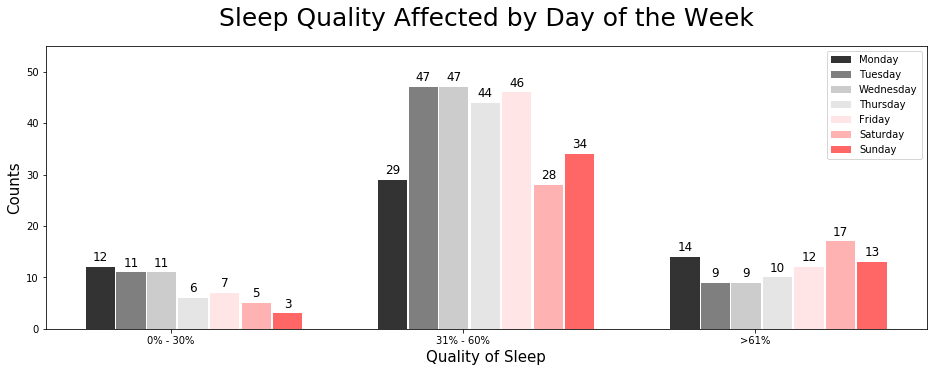

In [336]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['0% - 30%', '31% - 60%', '>61%']
Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values

x = np.arange(len(labels))  # the label locations
width = 0.08  # the width of the bars

fig, ax = plt.subplots(figsize=(13,5))
rects1 = ax.bar(x - width*3.002, 
                Monday, 
                .1, 
                label='Monday', 
                color='black',
                alpha=.8)
rects2 = ax.bar(x - width*1.7, 
                Tuesday, 
                .1, 
                label='Tuesday', 
                color='black',
                alpha=.5)
rects3 = ax.bar(x - width*.39, 
                Wednesday, 
                .1, 
                label='Wednesday', 
                color='black',
                alpha=.2)
rects4 = ax.bar(x + width*.96, 
                Thursday, 
                .1, 
                label='Thursday', 
                color='black',
                alpha=.1)
rects5 = ax.bar(x + width*2.31, 
                Friday, 
                .1, 
                label='Friday', 
                color='red',
                alpha=.1)
rects6 = ax.bar(x + width*3.665, 
                Saturday, 
                .1, 
                label='Saturday', 
                color='red',
                alpha=.3)
rects7 = ax.bar(x + width*5, 
                Sunday, 
                .1, 
                label='Sunday', 
                color='red',
                alpha=.6)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sleep Quality Affected by Day of the Week', 
             size=25, 
             y=1.05)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 55)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    size=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)


# consider doing a dist plot or scatter plot with the given parameters as a next step
# also, look into a violoin plot; plotly for the following 

fig.tight_layout()
plt.xlabel('Quality of Sleep', size=15)
plt.ylabel('Counts', size=15)
plt.show() 

In [364]:
import plotly.express as px
data = px.data.gapminder()

# new_df = px.data.data(new_df)
sleep_quality_hist = px.histogram(new_df, 
                                  x='Sleep quality',
                                  #  histnorm='percent',
                                  histnorm='probability density',
                                  #  nbins=0,
                                  #  range_x=(0, .3)),
                                  # marginal='rug',
                                  nbins=47,
                                  title='Sleep Quality Distribtion',
                                  labels={'Sleep quality': 'Sleep Quality Distribution'})

# Bar plot: average time asleep, 

import plotly.graph_objects as go

avg_tbed = go.Figure()

avg_tbed.add_trace(go.Box(y=new_df['Time in bed'], 
                          name='Time Asleep',   
                          marker_color='royalblue',    
                          boxmean='sd',
                          boxpoints='all', # represent mean and standard deviation
                          notched=True,), )
avg_tbed.update_layout(title_text='Time Asleep (h) Statistics')


timbd_v_qual = px.bar(new_df, 
                      x='Sleep quality', 
                      y='Time in bed',
                      hover_data=['Sleep quality'], 
                      color='Sleep quality',
                      labels={'Time in bed' : 'Time Asleep (h)',
                              'Sleep quality': 'Quality of Sleep'}, 
                      height=400,
                      title='Sample Distribution: Sleep Quality and Time Asleep as it Relates to Activity')

act_v_qual = px.bar(new_df, 
                    x='Sleep quality', 
                    y='Activity (steps)',
                    hover_data=['Sleep quality', 'Time in bed'], 
                    color='Time in bed',
                    labels={'Sleep quality': 'Quality of Sleep Distribution',
                            'Activity (steps)': 'Activity (steps)'}, 
                    height=400,
                    title='Sample Distribution: Sleep Quality as it Relates to Time Asleep')


# data = px.data.ne 
qual_v_wkdy = px.box(new_df, 
                     x='Weekday categories',
                     y='Sleep quality',
                     #  range_y=(0, .4), 
                     points='suspectedoutliers', 
                     category_orders={'Weekday categories':
                                      ['Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday', 
                                       'Sunday']},
                     notched=True,
                     title='Sleep Quality Throughout the Week',
                     labels={'Weekday categories': 'Day of the Week',})


sleep_quality_hist.show()
avg_tbed.show()
qual_v_wkdy.show()
timbd_v_qual.show()
act_v_qual.show()

In [339]:
import plotly.express as px
# data = px.data.ne 
qual_v_wkdy = px.box(new_df, 
                     x='Weekday categories',
                     y='Sleep quality',
                     #  range_y=(0, .4), 
                     points='suspectedoutliers', 
                     category_orders={'Weekday categories':
                                      ['Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday', 
                                       'Sunday']},
                     notched=True)
qual_v_wkdy.show()

In [340]:
new_df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories
0,00:17:44,06:31:59,0.55,6.23,0,1,2018-08-21,31% - 60%,Tuesday
1,00:08:58,06:48:15,0.77,6.65,0,2,2018-08-22,>60%,Wednesday
2,00:26:59,05:14:15,0.57,4.78,0,3,2018-08-23,31% - 60%,Thursday
3,02:22:35,06:25:43,0.35,4.05,0,6,2018-08-26,31% - 60%,Sunday
4,00:54:25,08:24:27,0.62,7.50,0,0,2018-08-27,>60%,Monday


In [341]:
new_df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories
0,00:17:44,06:31:59,0.55,6.23,0,1,2018-08-21,31% - 60%,Tuesday
1,00:08:58,06:48:15,0.77,6.65,0,2,2018-08-22,>60%,Wednesday
2,00:26:59,05:14:15,0.57,4.78,0,3,2018-08-23,31% - 60%,Thursday
3,02:22:35,06:25:43,0.35,4.05,0,6,2018-08-26,31% - 60%,Sunday
4,00:54:25,08:24:27,0.62,7.50,0,0,2018-08-27,>60%,Monday


In [342]:

new_df['Start by hour'] = pd.to_datetime(sc_sleep_data['Start'],
                                         infer_datetime_format=True)

new_df['Start by hour'] = np.array(new_df['Start by hour'], 
                                   dtype=np.datetime64)

new_df['Start by hour'] = new_df['Start by hour'].dt.hour

new_df['End by hour'] = pd.to_datetime(sc_sleep_data['End'],
                                       infer_datetime_format=True)

new_df['End by hour'] = np.array(new_df['End by hour'], 
                                 dtype=np.datetime64)

new_df['End by hour'] = new_df['End by hour'].dt.hour

new_df['Start by week'] = pd.to_datetime(sc_sleep_data['Start'],
                                         infer_datetime_format=True)

new_df['Start by week'] = np.array(new_df['Start by week'], 
                                   dtype=np.datetime64)

new_df['Start by week'] = new_df['Start by week'].dt.week

new_df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories,Start by hour,End by hour,Start by week
0,00:17:44,06:31:59,0.55,6.23,0,1,2018-08-21,31% - 60%,Tuesday,0,6,34
1,00:08:58,06:48:15,0.77,6.65,0,2,2018-08-22,>60%,Wednesday,0,6,34
2,00:26:59,05:14:15,0.57,4.78,0,3,2018-08-23,31% - 60%,Thursday,0,5,34
3,02:22:35,06:25:43,0.35,4.05,0,6,2018-08-26,31% - 60%,Sunday,2,6,34
4,00:54:25,08:24:27,0.62,7.50,0,0,2018-08-27,>60%,Monday,0,8,35


In [343]:
new_df['Start by hour'].value_counts()

1     133
2      95
0      56
3      54
6      25
4      20
23     13
5      11
7       7
8       3
22      2
Name: Start by hour, dtype: int64

In [362]:
# Scatter plot of the time i go to sleep/wake


# import plotly.express as px
# # iris = px.data.new_df() # iris is a pandas DataFrame
# fig = px.scatter(new_df, x='Start by hour', y='Sleep quality')
# fig.show()

import plotly.express as px

tbed_v_bedt = px.scatter(new_df, 
                         x='Start by hour', 
                         y='Time in bed', 
                         color='Sleep quality', 
                         hover_data=['Sleep quality'],
                         size='Sleep quality',
                         title='Sleep Quality Affected by Bed Time',
                         labels={'Start by hour': 'Bed Time',
                                 'Time in bed': 'Time Asleep (hrs)'},)

tbed_v_wkup = px.scatter(new_df, 
                         x='End by hour', 
                         y='Time in bed', 
                         color='Sleep quality',  
                         hover_data=['Sleep quality'],
                         size='Sleep quality',
                         title='Sleep Quality Affected by Wake-up Time',
                         labels={'End by hour': 'Wake-up Time',
                                 'Time in bed': 'Time Asleep (hrs)'})



wkup_v_bedt = px.scatter(new_df, 
                         x='Start by hour', 
                         y='End by hour', 
                         color='Sleep quality',  
                         hover_data=['Sleep quality', 'Time in bed'],
                         range_x=(-1, 10), 
                         range_y=(0, 15), 
                         size='Sleep quality',
                         title='Early to Bed Late to Rise = Better Sleep',
                         labels={'End by hour': 'Wake-up Time',
                                 'Start by hour': 'Bed Time'})

tbed_v_bedt.show()
tbed_v_wkup.show()
wkup_v_bedt.show()

In [345]:
weather_df = pd.read_csv('/content/1950768.csv')
weather_df

,STATION,DATE,AWND,TAVG
0,US1CALA0036,2018-08-20,NaN,NaN
1,US1CALA0036,2018-08-21,NaN,NaN
2,US1CALA0036,2018-08-22,NaN,NaN
3,US1CALA0036,2018-08-23,NaN,NaN
4,US1CALA0036,2018-08-24,NaN,NaN
...,...,...,...,...
27044,USC00040144,2019-09-26,NaN,NaN
27045,USC00040144,2019-09-27,NaN,NaN
27046,USC00040144,2019-09-28,NaN,NaN
27047,USC00040144,2019-09-29,NaN,NaN


In [346]:
weather_df = weather_df.dropna()
weather_df

,STATION,DATE,AWND,TAVG
2703,USW00023129,2018-08-20,5.82,76.0
2704,USW00023129,2018-08-21,6.04,75.0
2705,USW00023129,2018-08-22,5.82,76.0
2706,USW00023129,2018-08-23,5.82,75.0
2707,USW00023129,2018-08-24,5.37,73.0
...,...,...,...,...
7431,USW00023174,2019-11-06,4.92,63.0
7432,USW00023174,2019-11-07,6.26,63.0
7433,USW00023174,2019-11-08,4.70,65.0
7434,USW00023174,2019-11-09,6.26,72.0


In [347]:
weather_df = pd.DataFrame(weather_df.drop(columns='STATION'))
weather_df

,DATE,AWND,TAVG
2703,2018-08-20,5.82,76.0
2704,2018-08-21,6.04,75.0
2705,2018-08-22,5.82,76.0
2706,2018-08-23,5.82,75.0
2707,2018-08-24,5.37,73.0
...,...,...,...
7431,2019-11-06,4.92,63.0
7432,2019-11-07,6.26,63.0
7433,2019-11-08,4.70,65.0
7434,2019-11-09,6.26,72.0


In [348]:
weather_df['DATE'] = weather_df['DATE'].drop_duplicates(keep='first')
weather_df.shape

(890, 3)

In [349]:
weather_df = weather_df.dropna()
print(weather_df.shape)
weather_df.head(3)

(445, 3)


,DATE,AWND,TAVG
2703,2018-08-20,5.82,76.0
2704,2018-08-21,6.04,75.0
2705,2018-08-22,5.82,76.0


In [350]:
weather_df.columns = ['Date', 'AvgWnd', 'TAvg']

weather_df['Date'] = weather_df['Date'].astype(str)

print(weather_df.head(3))

weather_df.shape

            Date  AvgWnd  TAvg
2703  2018-08-20    5.82  76.0
2704  2018-08-21    6.04  75.0
2705  2018-08-22    5.82  76.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(445, 3)

In [0]:
new_df['Date'] = new_df['Date'].astype(str)

In [352]:
left = new_df
right = weather_df

concat_df = pd.merge(new_df, 
                     weather_df, 
                     on='Date', 
                     how='inner')
concat_df

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories,Start by hour,End by hour,Start by week,AvgWnd,TAvg
0,00:17:44,06:31:59,0.55,6.23,0,1,2018-08-21,31% - 60%,Tuesday,0,6,34,6.04,75.0
1,00:08:58,06:48:15,0.77,6.65,0,2,2018-08-22,>60%,Wednesday,0,6,34,5.82,76.0
2,00:26:59,05:14:15,0.57,4.78,0,3,2018-08-23,31% - 60%,Thursday,0,5,34,5.82,75.0
3,02:22:35,06:25:43,0.35,4.05,0,6,2018-08-26,31% - 60%,Sunday,2,6,34,5.82,74.0
4,00:54:25,08:24:27,0.62,7.50,0,0,2018-08-27,>60%,Monday,0,8,35,5.59,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,03:00:50,06:56:19,0.43,3.92,0,4,2019-11-01,31% - 60%,Friday,3,6,44,4.47,66.0
360,03:44:03,07:50:34,0.43,4.10,1838,0,2019-11-04,31% - 60%,Monday,3,7,45,2.91,65.0
361,02:41:41,08:08:23,0.61,5.43,1991,1,2019-11-05,>60%,Tuesday,2,8,45,3.58,63.0
362,01:14:34,06:43:26,0.62,5.47,2547,3,2019-11-07,>60%,Thursday,1,6,45,3.13,63.0


In [353]:
concat_df['Sleep Quality Categories'].isna().sum()

2

In [354]:
concat_df = concat_df.dropna()
print(concat_df.shape)
print(concat_df.isnull().any())
concat_df.head(3)

(362, 14)
Start                       False
End                         False
Sleep quality               False
Time in bed                 False
Activity (steps)            False
Weekday                     False
Date                        False
Sleep Quality Categories    False
Weekday categories          False
Start by hour               False
End by hour                 False
Start by week               False
AvgWnd                      False
TAvg                        False
dtype: bool


,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories,Start by hour,End by hour,Start by week,AvgWnd,TAvg
0,00:17:44,06:31:59,0.55,6.23,0,1,2018-08-21,31% - 60%,Tuesday,0,6,34,6.04,75.0
1,00:08:58,06:48:15,0.77,6.65,0,2,2018-08-22,>60%,Wednesday,0,6,34,5.82,76.0
2,00:26:59,05:14:15,0.57,4.78,0,3,2018-08-23,31% - 60%,Thursday,0,5,34,5.82,75.0


In [0]:
# concat_df['Date'] = concat_df['Date'].drop_duplicates(keep='first')
# concat_df['Date'] = concat_df['Date'].dropna()
# print(concat_df.shape)
# concat_df.head(4)

In [356]:
import plotly.express as px


slp_qual_v_dt = px.scatter(concat_df, 
                           x='Date', 
                           y='TAvg', 
                           color='Sleep quality', 
                           size='Time in bed', 
                           hover_data=['Sleep quality'],
                           labels={'Date': 'Time of Year',
                                 'TAvg': 'Average T (F)'},
                           title='Sleep Affected by Temperature')

# comp_grph = px.scatter(concat_df, 
#                        x='Date', 
#                        y='TAvg', 
#                        color='Sleep quality', 
#                        size='Time in bed', 
#                        hover_data=['Sleep quality'],
#                        labels={'Date': 'Time of Year',
#                                 'TAvg': 'Average T (F)'})

time_v_temp = px.scatter(concat_df, 
                         x='Date', 
                         y='TAvg',
                         color='TAvg', 
                         size='TAvg',
                         hover_data=['Sleep quality'],
                         labels={'Date': 'Time of Year',
                                 'TAvg': 'Average T (F)'},
                         title='Temperature Through the Year')

slp_qual_v_wnd = px.scatter(concat_df, 
                            x='Date', 
                            y='AvgWnd', 
                            color='Sleep quality', 
                            size='Time in bed', 
                            hover_data=['Sleep quality'],
                            labels={'Date': 'Time of Year',
                                 'AvgWnd': 'Average Wind Speed (m/s)'},
                            title='Sleep Affected by Wind Speeds')

time_v_wnd = px.scatter(concat_df, 
                        x='Date', 
                        y='AvgWnd', 
                        color='AvgWnd', 
                        size='AvgWnd',   
                        hover_data=['Sleep quality'],
                        labels={'Date': 'Time of Year',
                              'AvgWnd': 'Average Wind Speed (m/s)'},
                        title='Wind Speeds Through the Year')

slp_qual_v_time_in_bed = px.scatter(concat_df, 
                                    x='Time in bed', 
                                    y='Sleep quality', 
                                    color='Sleep quality', 
                                    size='Time in bed', 
                                    hover_data=['Sleep quality'],
                                    labels={'Time in bed': 'Time Asleep (h)'},
                                    title='Sleep Quality Affected by Time Asleep')

# comp_grph.show()
time_v_temp.show()
time_v_wnd.show()
slp_qual_v_wnd.show()
slp_qual_v_dt.show()
slp_qual_v_time_in_bed.show()